In [76]:
import numpy as np
import numpy.random as rnd
import numpy.linalg as la
import matplotlib.pyplot as plt

In [130]:
# Gradient descent with backtracking
def graddesc_bt(f, df, x0, tol, maxiter=10000, rho=0.5, c=0.1):
    """
    Gradient descent with backtracking
    """
    x = np.vstack((x0+2*tol*np.ones(x0.shape),x0)).transpose()
    i = 1
    while ( la.norm(x[:,i]-x[:,i-1]) > tol ) and ( i < maxiter ):
        p = -df(x[:,i])
        # Start backtracking
        alpha = 1
        xnew = x[:,i] + alpha*p
        while (f(xnew) >= f(x[:,i]) + alpha*c*np.dot(p, df(x[:,i]))):
            alpha = alpha*rho
            xnew = x[:,i] + alpha*p
        x = np.concatenate((x,xnew.reshape((len(x0),1))), axis=1)
        i += 1
    return x[:,1:]

In [131]:
# Random data
X = np.zeros((2,20))
for i in range(10):
    X[:,i] = np.array([2,2]) + 0.5*rnd.randn(2)
for i in range(10):
    X[:,10+i] = np.array([0,0]) + 0.5*rnd.randn(2)

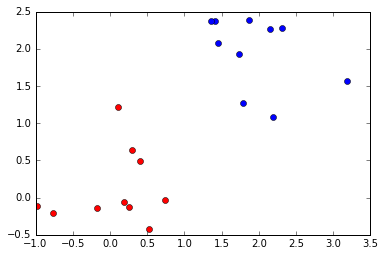

In [132]:
% matplotlib inline
plt.plot(X[0,0:10], X[1,0:10], 'o')
plt.plot(X[0,10:], X[1,10:], 'o', color='red')
plt.show()

In [133]:
y = np.concatenate((-np.ones(10),np.ones(10)))
X = np.concatenate((X, np.ones((1,20))), axis=0)

In [134]:
def f(w):
    return np.sum(np.log(1+np.exp(-y*(np.dot(w,X)))))

def df(w):
    return np.array([-np.sum(y*X[0,:]*np.exp(-y*np.dot(w,X))/(1+np.exp(-y*np.dot(w,X)))), 
                     -np.sum(y*X[1,:]*np.exp(-y*np.dot(w,X))/(1+np.exp(-y*np.dot(w,X)))),
                     -np.sum(y*X[2,:]*np.exp(-y*np.dot(w,X))/(1+np.exp(-y*np.dot(w,X))))])

In [135]:
W = graddesc_bt(f, df, np.array([-5.,-5.,10.]), 1.e-8)

In [136]:
def l(x):
    return (-W[0,-1]*x-W[2,-1])/W[1,-1]

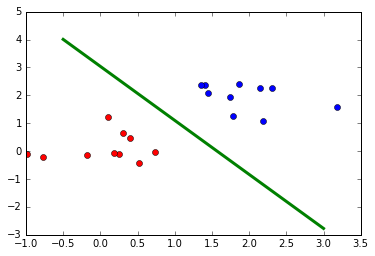

In [137]:
xx = np.linspace(-0.5,3,100)
yy = l(xx)
% matplotlib inline
plt.plot(X[0,0:10], X[1,0:10], 'o')
plt.plot(X[0,10:], X[1,10:], 'o', color='red')
plt.plot(xx,yy,linewidth=3)
plt.show()

In [138]:
# Generate test data
T = np.zeros((2,20))
for i in range(10):
    T[:,i] = np.array([2,2]) + 0.5*rnd.randn(2)
for i in range(10):
    T[:,10+i] = np.array([0,0]) + 0.5*rnd.randn(2)

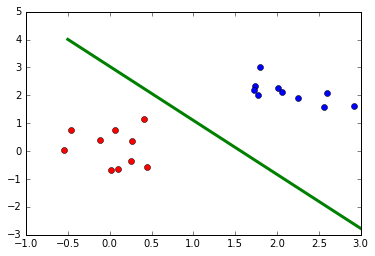

In [139]:
plt.plot(T[0,0:10], T[1,0:10], 'o')
plt.plot(T[0,10:], T[1,10:], 'o', color='red')
plt.plot(xx,yy,linewidth=3)
plt.savefig('testcloud.png')

In [143]:
risk = np.zeros(W.shape[1])
for i in range(W.shape[1]):
    risk[i] = f(W[:,i])

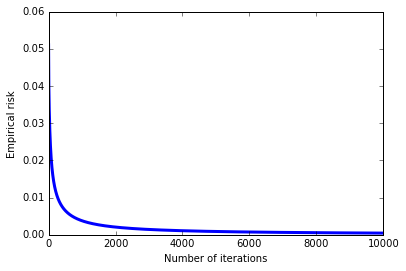

In [151]:
plt.plot(range(W.shape[1]), risk, linewidth=3)
plt.xlabel('Number of iterations')
plt.ylabel('Empirical risk')
plt.show()